In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

results_copa = []

lang_map = {
    "English": "en",
    "Croatian": "hr",
    "Serbian": "sr",
    "Slovenian": "sl",
    "Chakavian Dialect": "hr-ckm",
    "Macedonian": "mk",
    "Cerkno Dialect": "sl-cer",
    "Torlak Dialect": "sr-tor"
}

for x in results:
    cur_result = {}
    cur_result["Model"] = x["Model"]
    for lang in ["English", "Croatian", "Serbian", "Slovenian", "Macedonian", "Chakavian Dialect", "Cerkno Dialect", "Torlak Dialect"]:
        lang_code = lang_map[lang]
        if lang_code in x['Language-Specific Scores']:
            cur_result[f"{lang} (accuracy)"] = x['Language-Specific Scores'][lang_code]["Accuracy"]
    results_copa.append(cur_result)

temp_results_df = pd.DataFrame(results_copa)

merged_results = []

temp_results = temp_results_df.to_dict(orient="records")

for model in list(temp_results_df.Model.unique()):
	model_dict = {}
	model_dict["Model"] = model
	for x in temp_results:
		if x["Model"] == model:
			for lang in ["English", "Croatian", "Serbian", "Slovenian", "Macedonian", "Chakavian Dialect", "Cerkno Dialect", "Torlak Dialect"]:
				if x[f"{lang} (accuracy)"] >= 0:
					model_dict[f"{lang} (accuracy)"] = x[f"{lang} (accuracy)"]
	merged_results.append(model_dict)

results_df = pd.DataFrame(merged_results)
results_df

,Model,English (accuracy),Slovenian (accuracy),Croatian (accuracy),Chakavian Dialect (accuracy),Macedonian (accuracy),Torlak Dialect (accuracy),Cerkno Dialect (accuracy),Serbian (accuracy)
0,gpt-5-2025-08-07,0.996,0.998,0.990,0.916,0.986,0.984,0.886,0.992
1,gpt-4o-2024-08-06,0.988,0.970,0.972,0.774,0.968,0.932,0.676,0.972
2,gpt-3.5-turbo-0125,0.952,0.842,0.854,0.612,0.776,0.734,0.528,0.808
3,dummy-most_frequent,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
4,dummy-stratified,0.518,0.484,0.512,0.500,0.518,0.488,0.528,0.494
5,qwen3:32b,0.972,0.826,0.900,0.590,0.862,0.782,0.544,0.890
6,gemma3:27b,0.970,0.862,0.894,0.642,0.904,0.820,0.578,0.900
7,llama3.3:latest,0.986,0.870,0.926,0.674,0.894,0.798,0.536,0.922
8,deepseek-r1:14b,0.748,0.530,0.570,0.504,0.546,0.514,0.492,0.554
9,mistralai/mistral-medium-3.1,0.986,0.900,0.942,0.700,0.900,0.824,0.532,0.932


In [3]:
results_df.to_json("results.json", orient="records", lines=True)

# Plot a bar plot

In [4]:
import pandas as pd

results_df = pd.read_json("results.json", orient="records", lines=True)

results_df

,Model,English (accuracy),Slovenian (accuracy),Croatian (accuracy),Chakavian Dialect (accuracy),Macedonian (accuracy),Torlak Dialect (accuracy),Cerkno Dialect (accuracy),Serbian (accuracy)
0,gpt-5-2025-08-07,0.996,0.998,0.990,0.916,0.986,0.984,0.886,0.992
1,gpt-4o-2024-08-06,0.988,0.970,0.972,0.774,0.968,0.932,0.676,0.972
2,gpt-3.5-turbo-0125,0.952,0.842,0.854,0.612,0.776,0.734,0.528,0.808
3,dummy-most_frequent,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
4,dummy-stratified,0.518,0.484,0.512,0.500,0.518,0.488,0.528,0.494
5,qwen3:32b,0.972,0.826,0.900,0.590,0.862,0.782,0.544,0.890
6,gemma3:27b,0.970,0.862,0.894,0.642,0.904,0.820,0.578,0.900
7,llama3.3:latest,0.986,0.870,0.926,0.674,0.894,0.798,0.536,0.922
8,deepseek-r1:14b,0.748,0.530,0.570,0.504,0.546,0.514,0.492,0.554
9,mistralai/mistral-medium-3.1,0.986,0.900,0.942,0.700,0.900,0.824,0.532,0.932


In [5]:
results_df = results_df[~results_df["Model"].isin( ["dummy-stratified"])]

In [6]:
results_df.columns

Index(['Model', 'English (accuracy)', 'Slovenian (accuracy)',
       'Croatian (accuracy)', 'Chakavian Dialect (accuracy)',
       'Macedonian (accuracy)', 'Torlak Dialect (accuracy)',
       'Cerkno Dialect (accuracy)', 'Serbian (accuracy)'],
      dtype='object')

In [7]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "XLM-R-ParlaSent": "Fine-Tuned BERT-Like Model",
    "gpt-5-mini-2025-08-07": "GPT-5-mini",
    "gpt-5": "GPT-5",
    "gpt-5-2025-08-07": "GPT-5",
    "gpt-5-nano-2025-08-07": "GPT-5-Nano",
    "llama4:scout": "LLaMA 4 Scout",
    "qwen3:32b": "Qwen 3",
    'google/gemini-2.5-flash-lite': "Gemini 2.5 Flash Lite",
    'google/gemini-2.5-flash': "Gemini 2.5 Flash",
    'google/gemini-2.5-pro': "Gemini 2.5 Pro",
    'mistralai/mistral-medium-3.1': "Mistral Medium 3.1",
    'mistralai/mistral-small-3.2-24b-instruct': "Mistral Small 3.2",
    'cohere/command-a': "Command A",
    "anthropic/claude-haiku-4.5": "Claude Haiku 4.5"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

# Change the order of columns

results_df = results_df[['Model', 'English (accuracy)', 'Slovenian (accuracy)','Croatian (accuracy)','Serbian (accuracy)','Macedonian (accuracy)','Cerkno Dialect (accuracy)','Chakavian Dialect (accuracy)', 
'Torlak Dialect (accuracy)']]

results_df

/tmp/ipykernel_1946806/1185763770.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Model"] = results_df["Model"].replace(rename_dict)


,Model,English (accuracy),Slovenian (accuracy),Croatian (accuracy),Serbian (accuracy),Macedonian (accuracy),Cerkno Dialect (accuracy),Chakavian Dialect (accuracy),Torlak Dialect (accuracy)
0,GPT-5,0.996,0.998,0.990,0.992,0.986,0.886,0.916,0.984
1,GPT-4o,0.988,0.970,0.972,0.972,0.968,0.676,0.774,0.932
2,GPT-3.5-Turbo,0.952,0.842,0.854,0.808,0.776,0.528,0.612,0.734
3,Dummy (Frequent),0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
5,Qwen 3,0.972,0.826,0.900,0.890,0.862,0.544,0.590,0.782
6,Gemma 3,0.970,0.862,0.894,0.900,0.904,0.578,0.642,0.820
7,LLaMA 3.3,0.986,0.870,0.926,0.922,0.894,0.536,0.674,0.798
8,DeepSeek-R1-Distill,0.748,0.530,0.570,0.554,0.546,0.492,0.504,0.514
9,Mistral Medium 3.1,0.986,0.900,0.942,0.932,0.900,0.532,0.700,0.824
10,Gemini 2.5 Flash,0.990,0.974,0.980,0.972,0.968,0.742,0.790,0.944


In [8]:
print(results_df.sort_values(by="Croatian (accuracy)", ascending=False).to_markdown(index=False))

| Model               |   English (accuracy) |   Slovenian (accuracy) |   Croatian (accuracy) |   Serbian (accuracy) |   Macedonian (accuracy) |   Cerkno Dialect (accuracy) |   Chakavian Dialect (accuracy) |   Torlak Dialect (accuracy) |
|:--------------------|---------------------:|-----------------------:|----------------------:|---------------------:|------------------------:|----------------------------:|-------------------------------:|----------------------------:|
| GPT-5               |                0.996 |                  0.998 |                 0.99  |                0.992 |                   0.986 |                       0.886 |                          0.916 |                       0.984 |
| Gemini 2.5 Pro      |              nan     |                nan     |                 0.99  |              nan     |                   0.986 |                       0.864 |                          0.93  |                     nan     |
| Gemini 2.5 Flash    |                0.99  |  

In [9]:
# Get a selection of models

#results_df = results_df[results_df["Model"].isin(['Gemini 2.5 Flash', 'GPT-5','GPT-4o', 'Mistral Medium 3.1', 'LLaMA 3.3', 'Gemma 3', 'GPT-3.5-Turbo', 'Qwen 3', 'DeepSeek-R1-Distill',  'Dummy (Frequent)'])]

#results_df.sort_values(by="Model", ascending=True)

<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

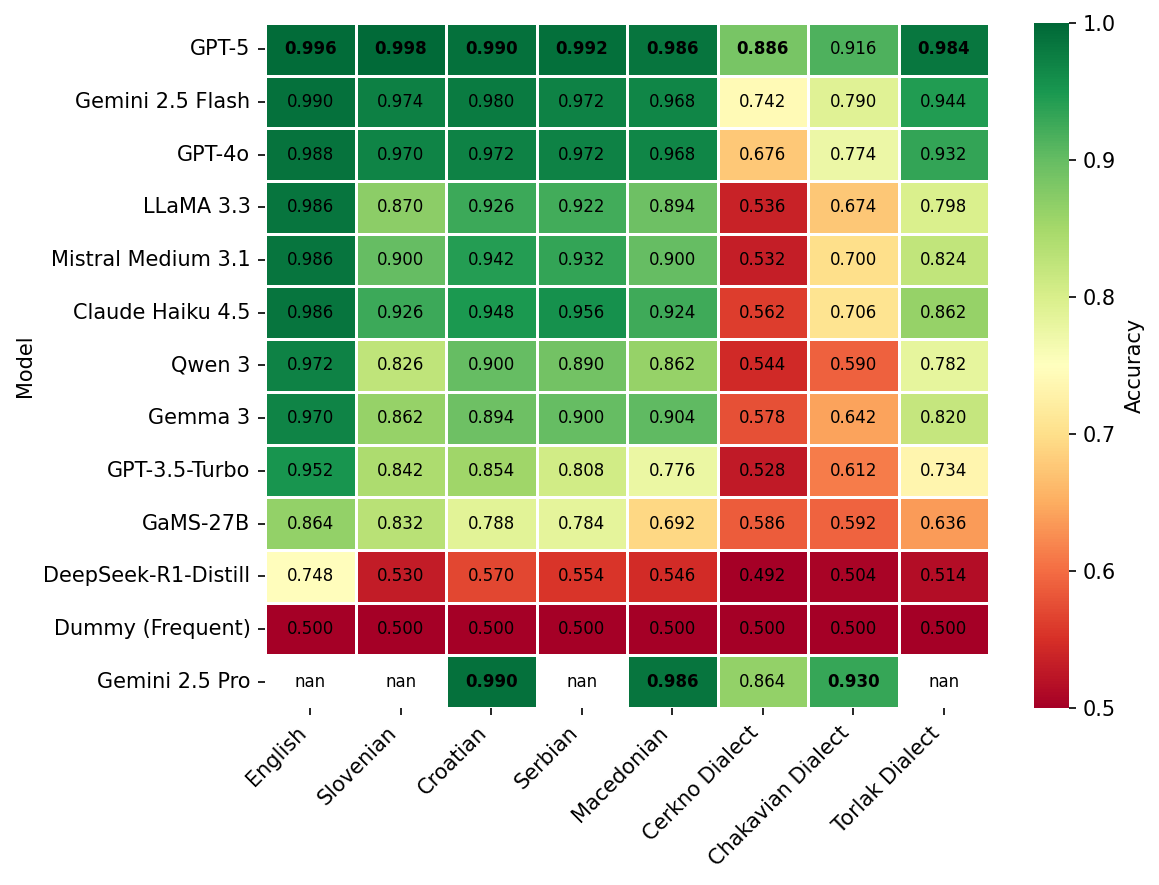

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=150)

# Prepare data
data = results_df.set_index("Model").sort_values(by="English (accuracy)", ascending=False)
# Rename columns

data.rename(columns={'English (accuracy)':'English', 'Slovenian (accuracy)':'Slovenian', 'Croatian (accuracy)':'Croatian','Serbian (accuracy)': 'Serbian', 'Macedonian (accuracy)': 'Macedonian', 'Cerkno Dialect (accuracy)': 'Cerkno Dialect', 'Chakavian Dialect (accuracy)': 'Chakavian Dialect', 'Torlak Dialect (accuracy)': 'Torlak Dialect'}, inplace=True)


# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0.5,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Accuracy'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("copa-results-heatmap.png", dpi=300)
plt


In [11]:
# GPT comparison

results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)",])]#'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model"]).transpose()

# Set the order
results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash', 'Gemma 3', 'LLaMA 3.3', 'Qwen 3', 'Claude Haiku 4.5']]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Mistral Medium 3.1,Gemini 2.5 Flash,Gemma 3,LLaMA 3.3,Qwen 3,Claude Haiku 4.5
English (accuracy),0.952,0.988,0.996,0.986,0.990,0.970,0.986,0.972,0.986
Slovenian (accuracy),0.842,0.970,0.998,0.900,0.974,0.862,0.870,0.826,0.926
Croatian (accuracy),0.854,0.972,0.990,0.942,0.980,0.894,0.926,0.900,0.948
Serbian (accuracy),0.808,0.972,0.992,0.932,0.972,0.900,0.922,0.890,0.956
Macedonian (accuracy),0.776,0.968,0.986,0.900,0.968,0.904,0.894,0.862,0.924
Cerkno Dialect (accuracy),0.528,0.676,0.886,0.532,0.742,0.578,0.536,0.544,0.562
Chakavian Dialect (accuracy),0.612,0.774,0.916,0.700,0.790,0.642,0.674,0.590,0.706
Torlak Dialect (accuracy),0.734,0.932,0.984,0.824,0.944,0.820,0.798,0.782,0.862


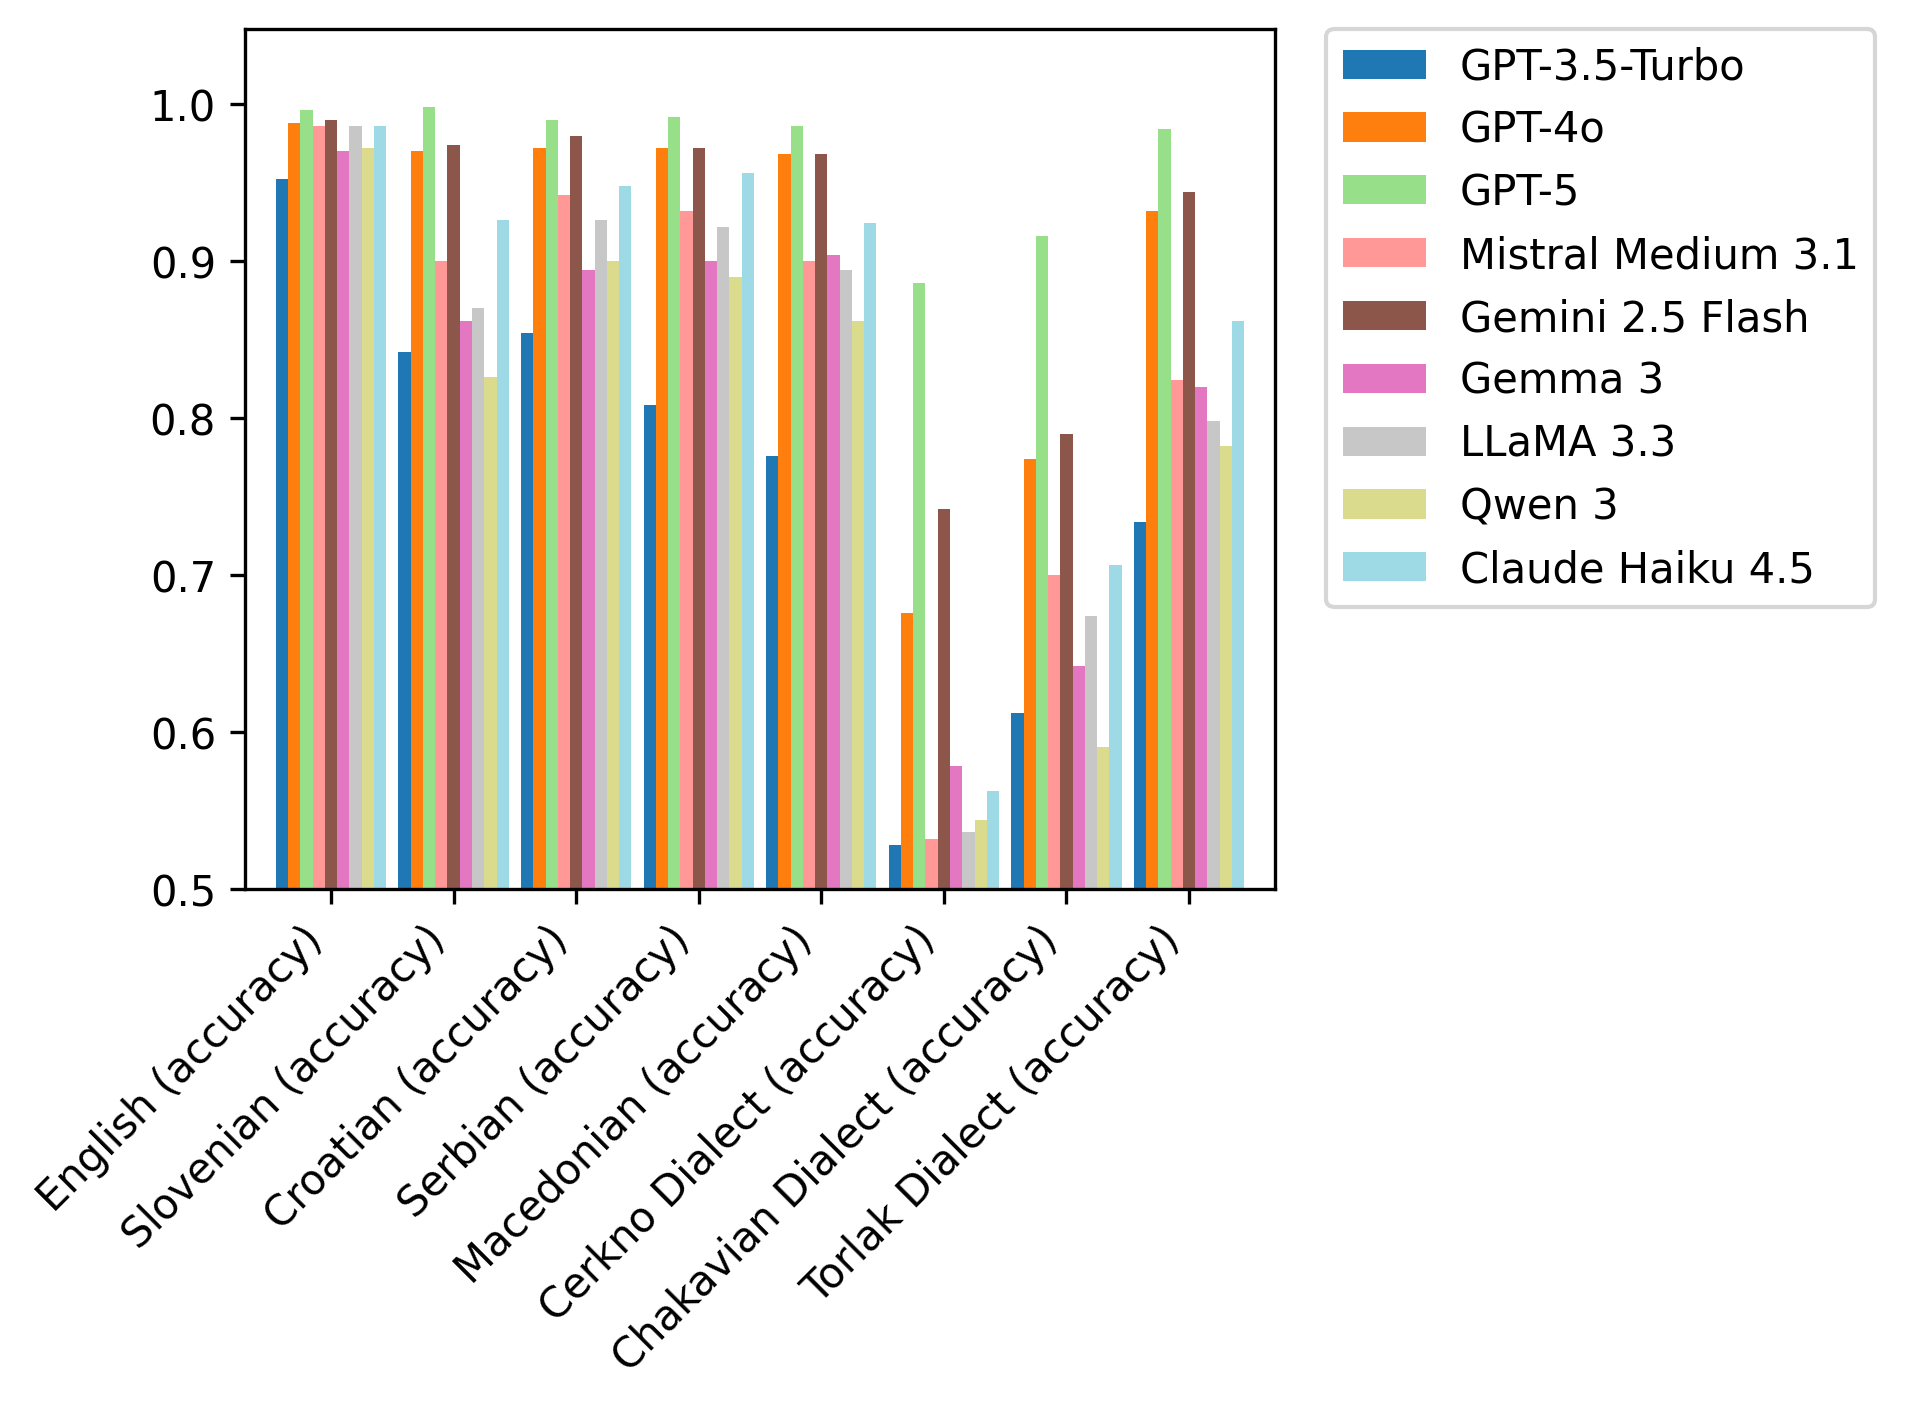

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.5, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("gpt_comparison.png", dpi=300)
plt.show()
